#### Zadanie_9_2

Czy istnieje zależność pomiędzy tym, kto jest bezpośrednim przełożonym (ManagerName, ManagerID) danego pracownika, a oceną wydajności pracy (PerformanceScore)?
Jakie źródła pozyskania pracownika (Recruitment Source) są najlepsze, jeśli zależy nam na jak najdłuższym stażu pracowników?
Czy stan cywilny (MartialDesc) pracownika koreluje w jakikolwiek sposób z zadowoleniem z pracy (EmpSatisfaction)?
Jak wygląda struktura wieku aktualnie zatrudnionych pracowników?
Czy starsi pracownicy pracują nad większą liczbą specjalnych projektów niż młodsi pracownicy?

In [93]:
# !pip install matplotlib==3.5.3 seaborn==0.12.2

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [95]:
import seaborn as sns

In [96]:
df = pd.read_csv('HRDataset.csv')
df.head(3)

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.5,...,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,1/15/2019,0.0
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.0,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,1/17/2019,0.0
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.0,...,Admin Offices,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,1/18/2019,0.0


#### Sprawdzam puste wiersze i pola w tabeli

Usuwam puste wiersze

In [97]:
df = df[df['Employee_Name'].notna()]
df

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,1/15/2019,0.0
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,1/17/2019,0.0
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,1/18/2019,0.0
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0,NaN,NaN
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,1/15/2019,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,"Daniele, Ann",1.411071e+09,1.0,1.0,0.0,3.0,3.0,3.0,0.0,54.10,...,IT/IS,Peter Monroe,7.0,Vendor Referral,Fully Meets,1.55,5.0,8.0,2/12/2019,0.0
306,"Lajiri, Jyoti",1.108028e+09,1.0,1.0,1.0,3.0,3.0,3.0,0.0,56.20,...,IT/IS,Peter Monroe,7.0,Employee Referral,Fully Meets,4.46,5.0,6.0,1/7/2019,0.0
307,"Semizoglou, Jeremiah",9.040136e+08,1.0,1.0,1.0,2.0,3.0,3.0,0.0,53.80,...,IT/IS,Peter Monroe,7.0,On-campus Recruiting,Fully Meets,3.27,4.0,5.0,1/14/2019,0.0
308,"South, Joe",1.308061e+09,0.0,0.0,1.0,1.0,3.0,3.0,0.0,53.00,...,IT/IS,Peter Monroe,7.0,Employee Referral,Fully Meets,5.00,3.0,4.0,1/2/2019,0.0


<Axes: >

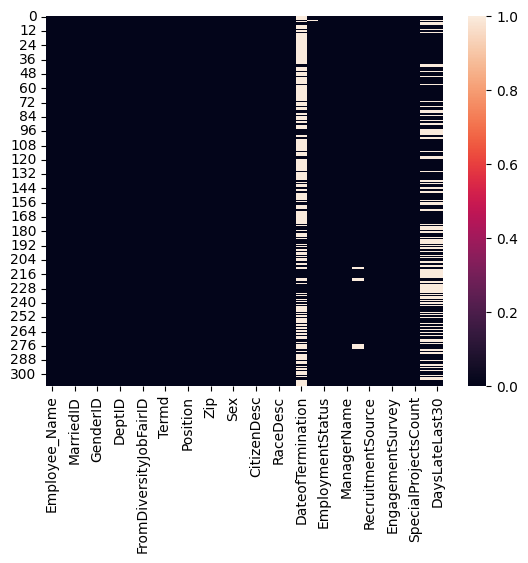

In [98]:
sns.heatmap(df.isnull())

##### 1) Czy istnieje zależność pomiędzy tym, kto jest bezpośrednim przełożonym (ManagerName, ManagerID) danego pracownika, a oceną wydajności pracy (PerformanceScore)?

- manager name - 310 wartości
- performance score - 310 wartości
- nie ma brakujących danych potrzebnych do analizy zależności

In [99]:

pd.crosstab(df['ManagerName'],df['PerformanceScore'])

PerformanceScore,Exceeds,Fully Meets,Needs Improvement,PIP
ManagerName,,,,
Alex Sweetwater,2,6,1,0
Amy Dunn,3,15,1,2
Board of Directors,0,2,0,0
Brandon R. LeBlanc,0,7,0,0
Brannon Miller,7,9,1,4
Brian Champaigne,0,8,0,0
David Stanley,1,19,1,0
Debra Houlihan,0,2,1,0
Elijiah Gray,2,18,2,0


<Axes: xlabel='PerformanceScore', ylabel='ManagerName'>

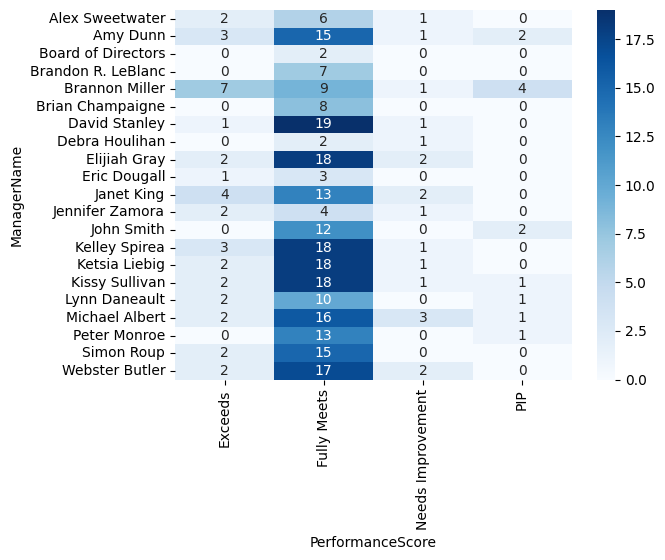

In [100]:
tabela = pd.crosstab(df['ManagerName'], df['PerformanceScore'])
sns.heatmap(tabela, annot=True, fmt="d", cmap='Blues')

Nie wszyscy managerowi maja tę samą liczbę podwładnych , Ci którzy mają zbliżoną liczbę podwadnych, ich pracownicy osiąaja podobne wyniki. W przypadku Brannona Milera, sytuacja jest ciekawa, z jedej strony ma największą liczbe pracowników, ktrórzy przekraczaja oczekiwania, ale z drugiej strony ma on też najwiekszą liczbę pracowników, ktrórzy nie spełniają oczekiwań. 


#### Jakie źródła pozyskania pracownika (Recruitment Source) są najlepsze, jeśli zależy nam na jak najdłuższym stażu pracowników?

In [101]:
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,1/15/2019,0.0
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,1/17/2019,0.0
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,1/18/2019,0.0
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0,NaN,NaN
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,1/15/2019,0.0


In [102]:
df['RecruitmentSource'].unique()

array(['Diversity Job Fair', 'Website Banner Ads', 'Internet Search',
       'Pay Per Click - Google', 'Social Networks - Facebook Twitter etc',
       'Billboard', 'Monster.com', 'Newspager/Magazine',
       'Professional Society', 'Other', 'Employee Referral', 'Indeed',
       'Search Engine - Google Bing Yahoo', 'Glassdoor',
       'Vendor Referral', 'MBTA ads', 'Information Session',
       'Word of Mouth', 'Pay Per Click', 'On-campus Recruiting',
       'On-line Web application', 'Careerbuilder',
       'Company Intranet - Partner'], dtype=object)

DateofHire
DateofTermination
Termd

In [103]:
# tworzę nową kolumna dla daty zakonczenia pracy, jeśli jest pusta wstawiam date dzisiejszą (jeszcze pracuje)
today = pd.Timestamp.today()
df['DateofTermination2'] = df['DateofTermination']
df['DateofTermination2'] = df['DateofTermination2'].fillna(pd.Timestamp('today'))


In [104]:
#df.info()
df['DateofTermination2'] = pd.to_datetime(df['DateofTermination2'])
df['DateofHire'] = pd.to_datetime(df['DateofHire'])

In [105]:
df['Seniority'] = ((df['DateofTermination2'] - df['DateofHire']))
#df['Seniority'] = ((df['DateofTermination2'] - df['DateofHire'])/365).astype(int)

In [106]:
df['Seniority_days'] = df['Seniority'].dt.days

In [107]:
df[['RecruitmentSource','DateofTermination','DateofHire','DateofTermination2','Seniority','Seniority_days']]

,RecruitmentSource,DateofTermination,DateofHire,DateofTermination2,Seniority,Seniority_days
0,Diversity Job Fair,NaN,2008-10-27,2025-08-17 01:56:32.998804,6138 days 01:56:32.998804,6138
1,Website Banner Ads,NaN,2014-01-06,2025-08-17 01:56:32.998804,4241 days 01:56:32.998804,4241
2,Internet Search,NaN,2014-09-29,2025-08-17 01:56:32.998804,3975 days 01:56:32.998804,3975
3,Pay Per Click - Google,04/15/15,2015-02-16,2015-04-15 00:00:00.000000,58 days 00:00:00,58
4,Website Banner Ads,NaN,2015-05-01,2025-08-17 01:56:32.998804,3761 days 01:56:32.998804,3761
...,...,...,...,...,...,...
305,Vendor Referral,NaN,2014-11-10,2025-08-17 01:56:32.998804,3933 days 01:56:32.998804,3933
306,Employee Referral,NaN,2014-11-10,2025-08-17 01:56:32.998804,3933 days 01:56:32.998804,3933
307,On-campus Recruiting,NaN,2016-06-30,2025-08-17 01:56:32.998804,3335 days 01:56:32.998804,3335
308,Employee Referral,NaN,2014-11-10,2025-08-17 01:56:32.998804,3933 days 01:56:32.998804,3933


##### analiza staży pracy pracowniko zatrudnionych za pomocą róznych spobów rekrutacji

In [108]:
df1 = df.groupby('RecruitmentSource')['Seniority_days'].mean().round().sort_values(ascending=False).reset_index(name='count')

In [109]:
df1

,RecruitmentSource,count
0,Careerbuilder,5249.0
1,Website Banner Ads,4075.0
2,Professional Society,3814.0
3,On-campus Recruiting,3800.0
4,Other,3791.0
5,MBTA ads,3738.0
6,Employee Referral,3709.0
7,Information Session,3667.0
8,Billboard,3620.0
9,Pay Per Click - Google,3571.0


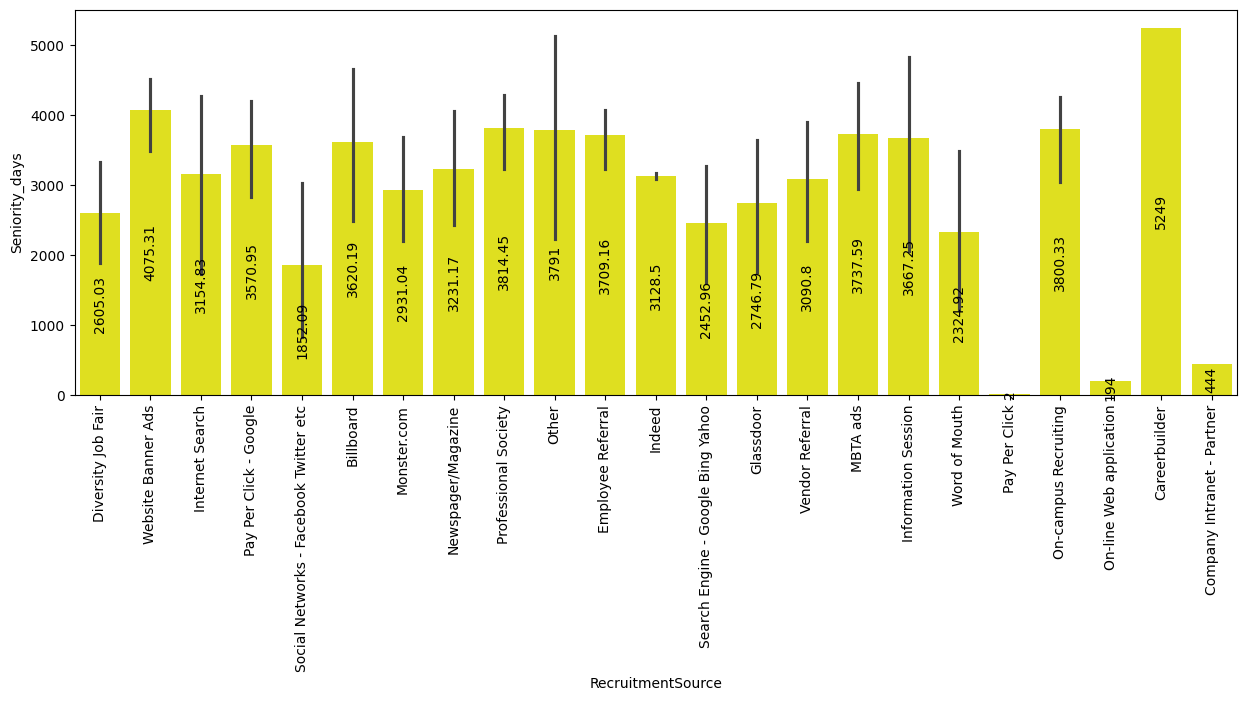

In [110]:
plt.figure(figsize=(15,5))
ax=sns.barplot(x='RecruitmentSource',y='Seniority_days',data=df, color='yellow')
plt.xticks(rotation=90)
#plt.tight_layout()
for container in ax.containers:
    ax.bar_label(container,label_type='center',fontsize=10, rotation=90)

##### analiza ilości pracowników zatrudnionych za pomocą róznych sposobów rekrutacji

In [111]:
df2 = df.groupby('RecruitmentSource')['EmpID'].count().sort_values(ascending=False).reset_index(name='count')


In [112]:
df2

,RecruitmentSource,count
0,Employee Referral,31
1,Diversity Job Fair,29
2,Search Engine - Google Bing Yahoo,25
3,Monster.com,24
4,Pay Per Click - Google,21
5,Professional Society,20
6,Newspager/Magazine,18
7,MBTA ads,17
8,Billboard,16
9,Vendor Referral,15


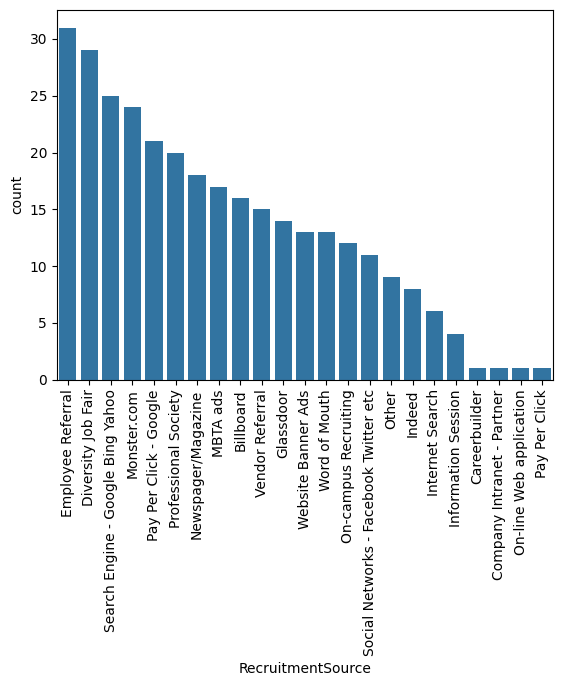

In [113]:
sns.barplot(data=df2, x='RecruitmentSource', y='count')
plt.xticks(rotation=90)
#plt.tight_layout()
plt.show()


##### wnioski:

Na podstawie analizy tylko stażu pracy i sposobu zatrudnienia, mogłoby się wydawać,że najlepszą metoda pozysiwania pracownika jest sposób "Carierbuilder"
którego, sredni staż pracy pracownika wynosi 5247 dni (około 14 lat),  ale nie jest to informacja obiektywna, gdyż tylko jeden pracownik został zatrudniony w ten sposób.
Wydaje się więc, że lepszymi metodami rekrutacji są: Website Banner Ads	- 4073.0 dni (około 11 lat) i 13 pracowników zrekrutowanych oraz Professional Society - 3813.0 (około 10 lat) i 20 pracowników zrekrutowanych.

##### Czy stan cywilny (MartialDesc) pracownika koreluje w jakikolwiek sposób z zadowoleniem z pracy (EmpSatisfaction)? 

In [114]:
df.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'PayRate', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'DateofTermination2', 'Seniority', 'Seniority_days'],
      dtype='object')

In [115]:
df3 = df[['Employee_Name', 'MaritalDesc', 'EmpSatisfaction']]

In [116]:
df3

,Employee_Name,MaritalDesc,EmpSatisfaction
0,"Brown, Mia",Married,2.0
1,"LaRotonda, William",Divorced,4.0
2,"Steans, Tyrone",Single,5.0
3,"Howard, Estelle",Married,3.0
4,"Singh, Nan",Single,3.0
...,...,...,...
305,"Daniele, Ann",Married,5.0
306,"Lajiri, Jyoti",Married,5.0
307,"Semizoglou, Jeremiah",Married,4.0
308,"South, Joe",Single,3.0


In [117]:
pd.crosstab(df['MaritalDesc'],df['EmpSatisfaction'])

EmpSatisfaction,1.0,2.0,3.0,4.0,5.0
MaritalDesc,,,,,
Divorced,0,1,6,14,9
Married,0,5,54,31,33
Separated,1,0,4,2,5
Single,1,3,44,40,49
Widowed,0,0,0,6,2


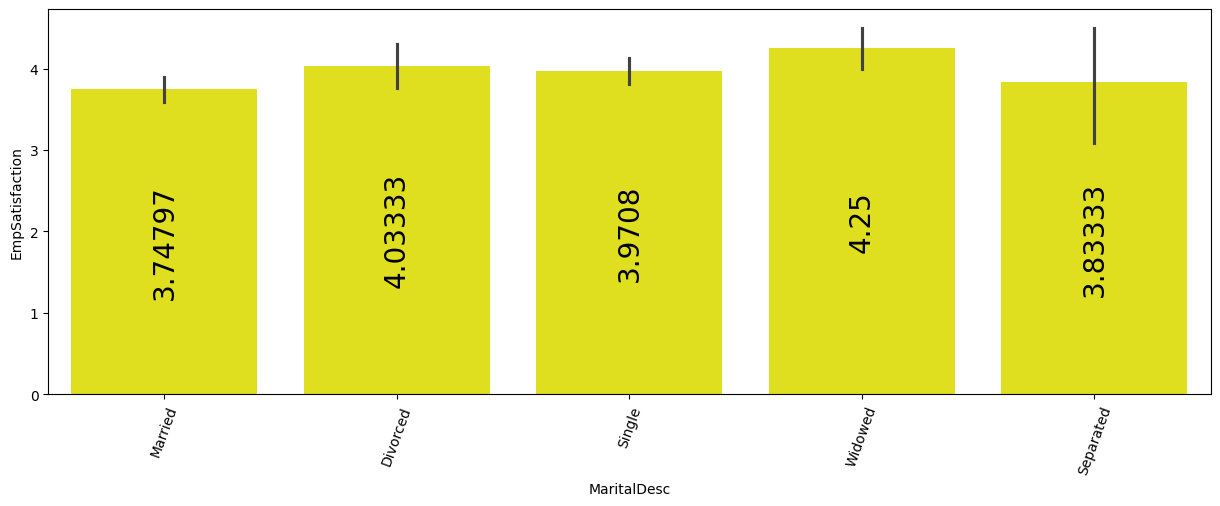

In [118]:
plt.figure(figsize=(15,5))
ax=sns.barplot(x='MaritalDesc',y='EmpSatisfaction',data=df3, color='yellow')
plt.xticks(rotation=70)
#plt.tight_layout()
for container in ax.containers:
   ax.bar_label(container,label_type='center',fontsize=20, rotation=90)

##### Wnioski

Najwyzszy sredni wskaźnik zadowolenie prezentuja grupa wdowców/wdów, ale jestto zarazem najmniej liczna grupa. Z drugiej strony róznice w stopniu zadowolenia nie są duże, dlatego wydaje się, ze stan cywilny ma marginalny wpływ na stopień zadowolenia.

#### Jak wygląda struktura wieku aktualnie zatrudnionych pracowników?

In [119]:
df.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'PayRate', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'DateofTermination2', 'Seniority', 'Seniority_days'],
      dtype='object')

In [120]:
# df['DOB2'] = pd.to_datetime(df['DOB'])
df['DOB3'] = pd.to_datetime(df["DOB"], format="%m/%d/%y")
df['DOB3_year'] = df['DOB3'].dt.year
df['today'] = pd.Timestamp('today')

In [121]:
# obliczam wiek pracownika (dzisiaj - data urodzenia i tworzę nową kolumnę
df['today'] = pd.to_datetime(df['today'], errors='coerce')
df['age'] = ((df['today'].dt.year - df['DOB3_year']))
df['age2'] = df['age'].apply(lambda x: x if x>=0 else 100+x) # age2 - wiek / lata
#df['age2']=df['age'].dt.days

In [122]:
df[['DOB','DOB3','today','age','DOB3_year', 'age2']]

,DOB,DOB3,today,age,DOB3_year,age2
0,11/24/87,1987-11-24,2025-08-17 01:56:35.479747,38,1987,38
1,04/26/84,1984-04-26,2025-08-17 01:56:35.479747,41,1984,41
2,09/01/86,1986-09-01,2025-08-17 01:56:35.479747,39,1986,39
3,09/16/85,1985-09-16,2025-08-17 01:56:35.479747,40,1985,40
4,05/19/88,1988-05-19,2025-08-17 01:56:35.479747,37,1988,37
...,...,...,...,...,...,...
305,01/18/52,2052-01-18,2025-08-17 01:56:35.479747,-27,2052,73
306,04/23/86,1986-04-23,2025-08-17 01:56:35.479747,39,1986,39
307,02/09/83,1983-02-09,2025-08-17 01:56:35.479747,42,1983,42
308,09/09/65,2065-09-09,2025-08-17 01:56:35.479747,-40,2065,60


In [123]:

df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,LastPerformanceReview_Date,DaysLateLast30,DateofTermination2,Seniority,Seniority_days,DOB3,DOB3_year,today,age,age2
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,1/15/2019,0.0,2025-08-17 01:56:32.998804,6138 days 01:56:32.998804,6138,1987-11-24,1987,2025-08-17 01:56:35.479747,38,38
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,1/17/2019,0.0,2025-08-17 01:56:32.998804,4241 days 01:56:32.998804,4241,1984-04-26,1984,2025-08-17 01:56:35.479747,41,41
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,1/18/2019,0.0,2025-08-17 01:56:32.998804,3975 days 01:56:32.998804,3975,1986-09-01,1986,2025-08-17 01:56:35.479747,39,39
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,...,NaN,NaN,2015-04-15 00:00:00.000000,58 days 00:00:00,58,1985-09-16,1985,2025-08-17 01:56:35.479747,40,40
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,1/15/2019,0.0,2025-08-17 01:56:32.998804,3761 days 01:56:32.998804,3761,1988-05-19,1988,2025-08-17 01:56:35.479747,37,37


In [124]:
# całkowita średnia wieku
df['age2'].mean()

np.float64(46.438709677419354)

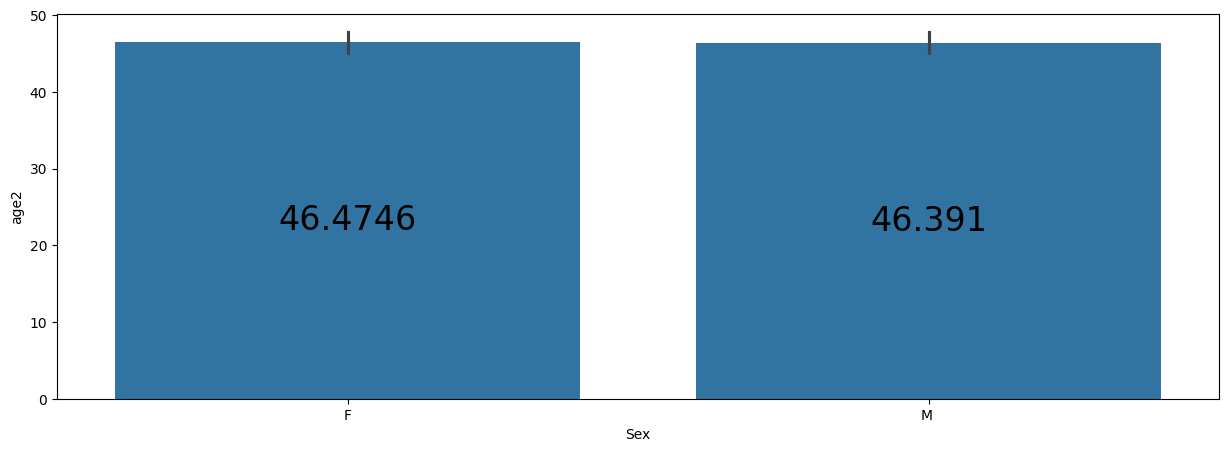

In [125]:
#średnia wieku ze wzgledu napłeć
plt.figure(figsize=(15,5))
ax=sns.barplot(x='Sex',y='age2',data=df)
for container in ax.containers:
   ax.bar_label(container, label_type='center',fontsize=24)

##### średnia wieku, mężczyzn i kobiet jest zbliżona. Dla męzczyzn sredni wiek to 46,5 lat, a dla kobiet 46,4

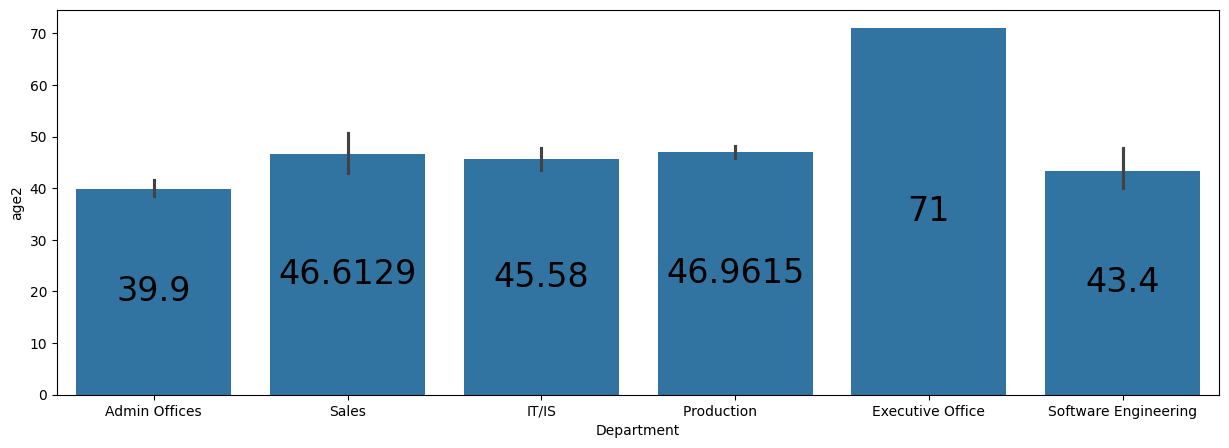

In [126]:
#średnia wieku ze wzgledu na dział w ktorym osoby pracują
plt.figure(figsize=(15,5))
ax=sns.barplot(x='Department',y='age2',data=df)
for container in ax.containers:
   ax.bar_label(container, label_type='center',fontsize=24)

In [127]:
df[df['Department'] == 'Executive Office']

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,LastPerformanceReview_Date,DaysLateLast30,DateofTermination2,Seniority,Seniority_days,DOB3,DOB3_year,today,age,age2
73,"King, Janet",1.001495e+09,1.0,1.0,0.0,1.0,2.0,3.0,0.0,80.0,...,1/17/2019,0.0,2025-08-17 01:56:32.998804,4794 days 01:56:32.998804,4794,2054-09-21,2054,2025-08-17 01:56:35.479747,-29,71


##### Najstarsza osoba pracuje w dziale Executive Office ( jedna osoba) i ma 71 lat,najniższą srednia wieku mozna zauważyc w dziale Admin Office

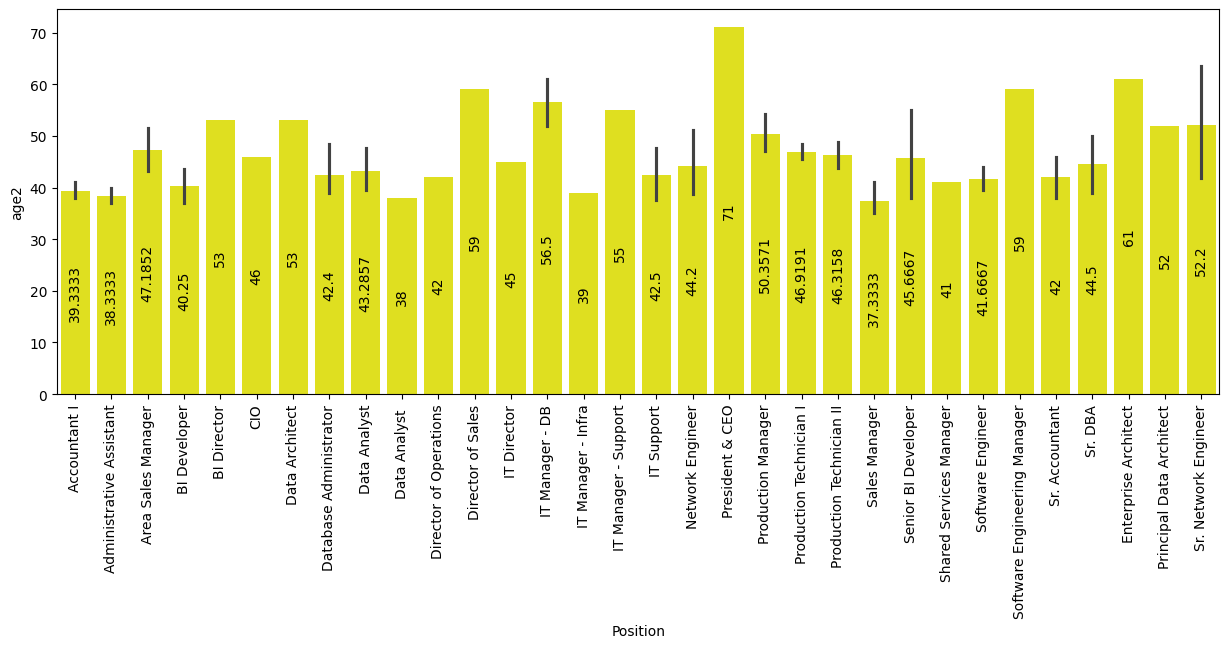

In [128]:
#średnia wieku ze wzgledu stanowisko
plt.figure(figsize=(15,5))
ax=sns.barplot(x='Position',y='age2',data=df,color='yellow')
plt.xticks(rotation=90)
for container in ax.containers:
   ax.bar_label(container, label_type='center',fontsize=10, rotation=90)

 ##### Najmłodsi pracownicy pracuja na pozycji 'Data Analyst', a najstarszy jako 'President &CEO', nastepna jajwyzsza średnia jest na stanowisku Enterprice Architect'

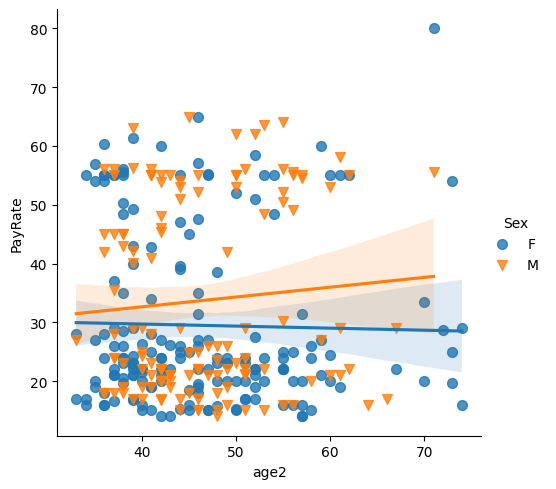

In [129]:
sns.lmplot(x='age2',y='PayRate',data=df,hue='Sex',markers=['o','v'],scatter_kws={'s':50})

Wydaje sie, że w przypadku kobiet, wiek nie ma wpywu na wysokość zarobków, natomiast w przypadku męzczyz taką zależność można zauważyć, przy czym wynik ten może być zakłamany prze pozycę "President & CEO",
ktory jest mężczyzną.

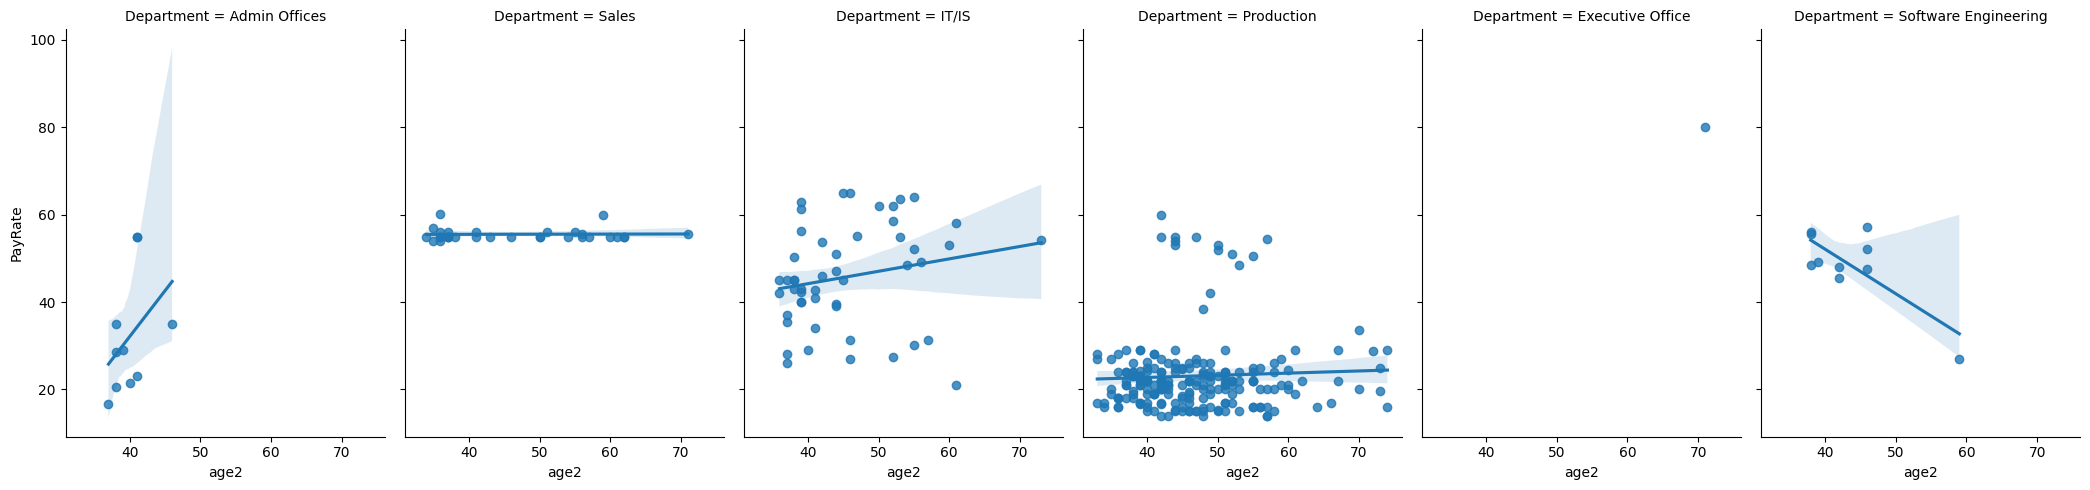

In [130]:

sns.lmplot(x='age2',y='PayRate',data=df,col='Department',aspect=0.7)

w przypadku działów "Admin Office" oraz "IT/IS", można zaobserwować, że wraz zwiekmiem zarobki (PayRate) wzrastają. 
w przypadku działu "Software Engineering", można zaobserwowąc spadek zrobków, wraz z wiekiem.
w przypadku działow "sales" oraz Production", nie mozna zaobserwowac wzrostu zarobków wraz z wiekiem.
Natomiast w przypadku diału "Executive Office"  wystepuje tylko jedna obserwacja i nie można zaobserwowąć wpływu wielku na zarobki.

#### Czy starsi pracownicy pracują nad większą liczbą specjalnych projektów niż młodsi pracownicy?

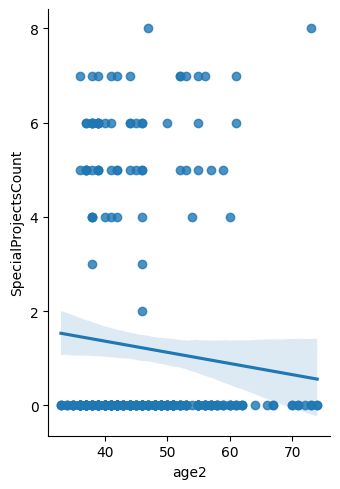

In [131]:
sns.lmplot(x='age2',y='SpecialProjectsCount',data=df,aspect=0.7)

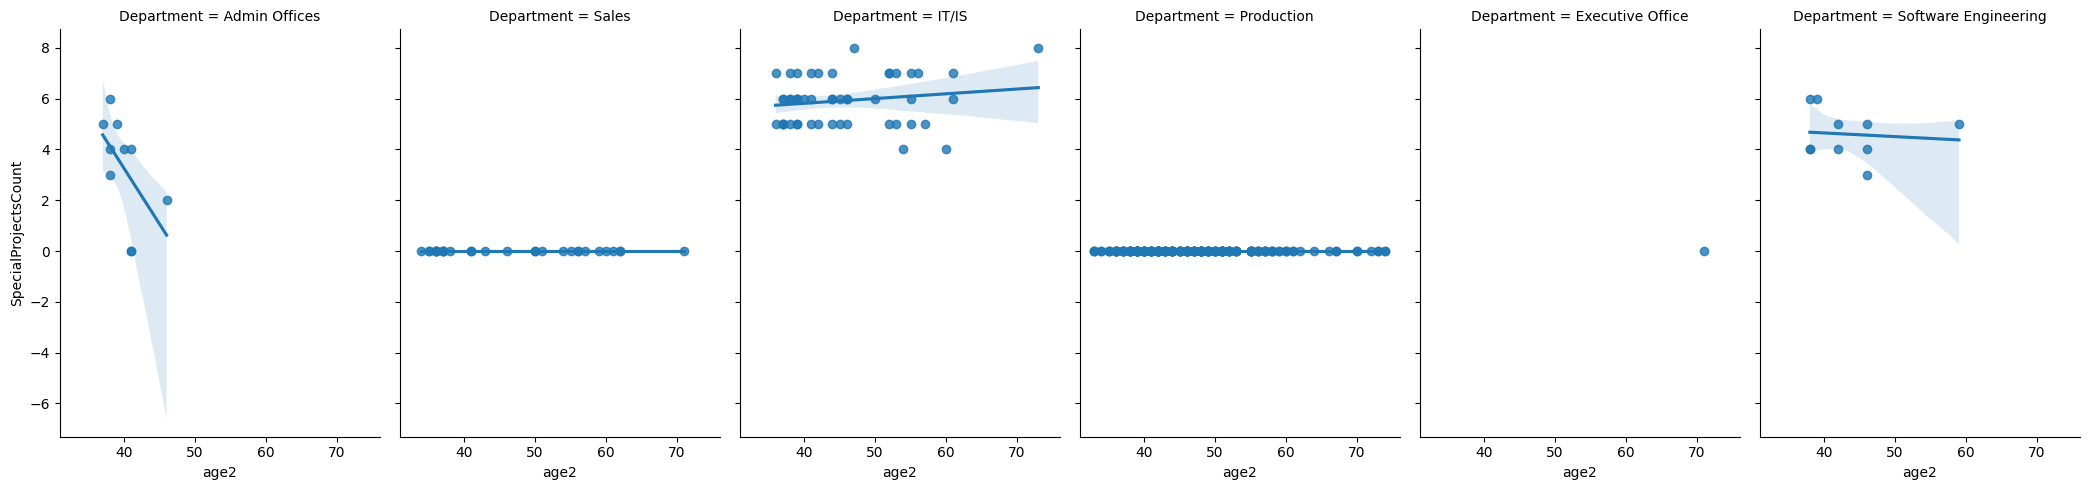

In [132]:
sns.lmplot(x='age2',y='SpecialProjectsCount',data=df,col='Department',aspect=0.7)

W przypadku wydziałów: "Sales" i "Production", "Software Engineering", nie zauważono wzrosty liczny projektów specjalnyh wraz z wiekiem.
W przypadku "Admin Offices"  zauważa sie spadek iloścu projektów specjalnych wraz z wiekiem.
W przypadku  IT/IS widac delikatny wzrost ilości projektów specjalnych wraz z wiekiem.
Dla Executive Office zauważono tylko jedną obserwację
    

In [133]:
# usuwam z obserwacji stanowiskio CEO
df_3 = df[df['age2']<73]

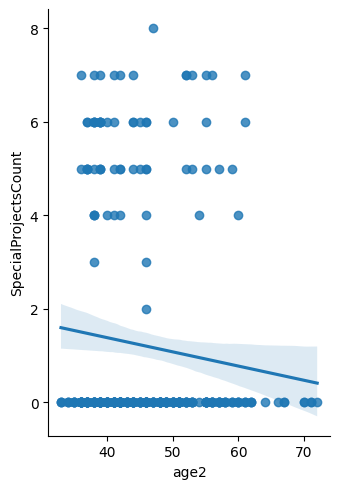

In [134]:
sns.lmplot(x='age2',y='SpecialProjectsCount',data=df_3,aspect=0.7)

#### Również po odrzuceniu stanowiska CEO (najstarszy pracownik), zauważa sie spadek ilosci projektów specjalnych wraz z wzrostem wieku